<a href="https://colab.research.google.com/github/GangadharaPranitha/Waste-Management/blob/main/wastemanagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#WASTE MANAGEMENT USING CNN MODEL

In [3]:
pip install opencv.python

In [4]:
pip install TensorFlow

In [5]:

# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:02<00:00, 216MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [7]:
import os  # Import the os module for path operations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from glob import glob

# Assuming 'versions/1' is the directory where both train and test data reside,
# we can create the paths as follows:
base_path = '/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1'
train_path = os.path.join(base_path, 'DATASET', 'TRAIN')  # Use os.path.join for path construction
test_path = os.path.join(base_path, 'DATASET', 'TEST')   # Use os.path.join for path construction

print("Train path:", train_path)
print("Test path:", test_path)

# Visualization
x_data = []
y_data = []

# Check if the training path exists
if not os.path.exists(train_path):
    print(f"Error: Training path '{train_path}' does not exist.")
else:
    for category in glob(train_path + '/*'):  # Modified to iterate through subfolders
        print(f"Processing category: {category}")  # Print the category being processed
        for file in tqdm(glob(category + '/*')):
            if os.path.exists(file):  # Check if the image file exists
                img_array = cv2.imread(file)
                if img_array is not None:  # Check if the image was loaded successfully
                    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                    x_data.append(img_array)
                    y_data.append(category.split('/')[-1])  # Extract the category name
                else:
                    print(f"Warning: Could not read image file: {file}")
            else:
                print(f"Warning: Image file does not exist: {file}")

# Create the DataFrame
data = pd.DataFrame({'image': x_data, "label": y_data})


Train path: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN
Test path: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST
Processing category: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN/R


100%|██████████| 9999/9999 [00:04<00:00, 2239.92it/s]


Processing category: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN/O


100%|██████████| 12565/12565 [00:06<00:00, 1910.18it/s]


In [8]:
print(data.shape)

(22564, 2)


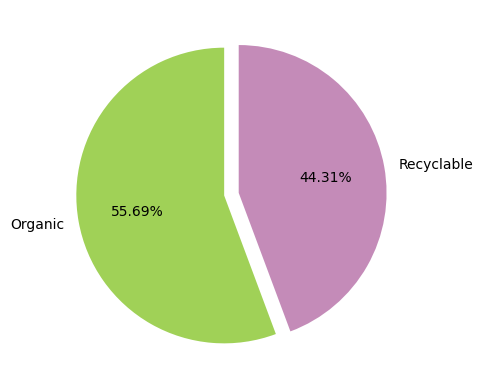

In [9]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%',
        colors = colors, startangle = 90,  explode=[0.05, 0.05])
plt.show()

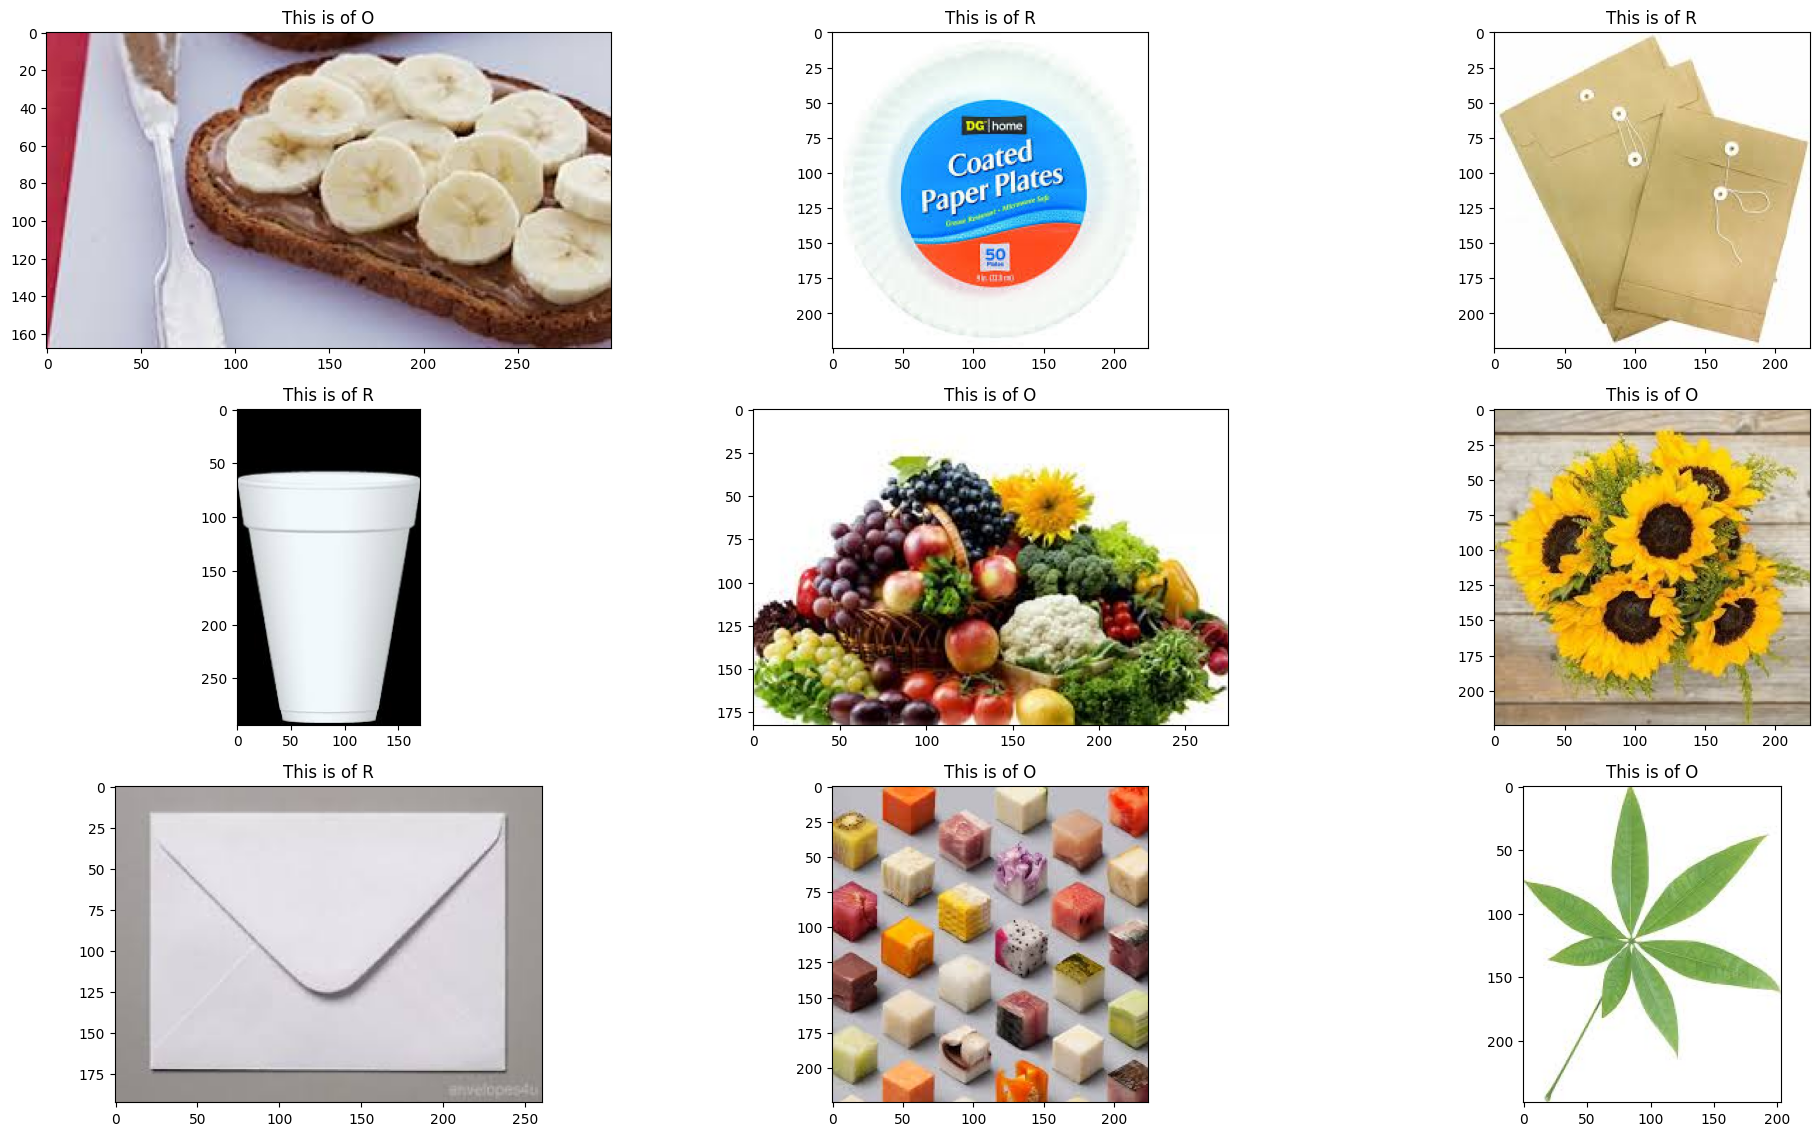

In [10]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

CNN -Convolutional Neural Network

In [11]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256



In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [28]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
batch_size = 512  # Or an even larger value, depending on your GPU memory
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [36]:
# @title Default title text
hist = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 276s 6s/step - accuracy: 0.8640 - loss: 0.3314 - val_accuracy: 0.8961 - val_loss: 0.2545
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 269s 6s/step - accuracy: 0.8693 - loss: 0.3273 - val_accuracy: 0.9129 - val_loss: 0.2302
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 270s 6s/step - accuracy: 0.8713 - loss: 0.3279 - val_accuracy: 0.8898 - val_loss: 0.2823
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 271s 6s/step - accuracy: 0.8758 - loss: 0.3175 - val_accuracy: 0.9005 - val_loss: 0.2673
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 271s 6s/step - accuracy: 0.8741 - loss: 0.3172 - val_accuracy: 0.8878 - val_loss: 0.2842


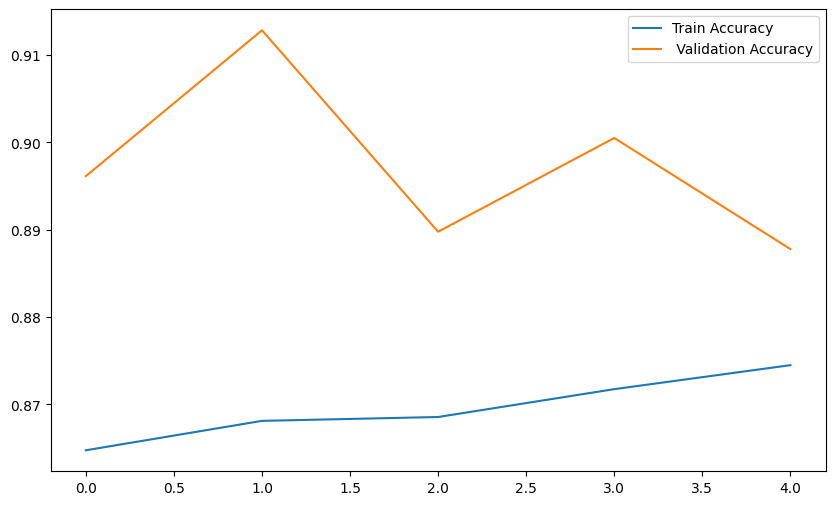

In [37]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label=' Validation Accuracy')
plt.legend()
plt.show()

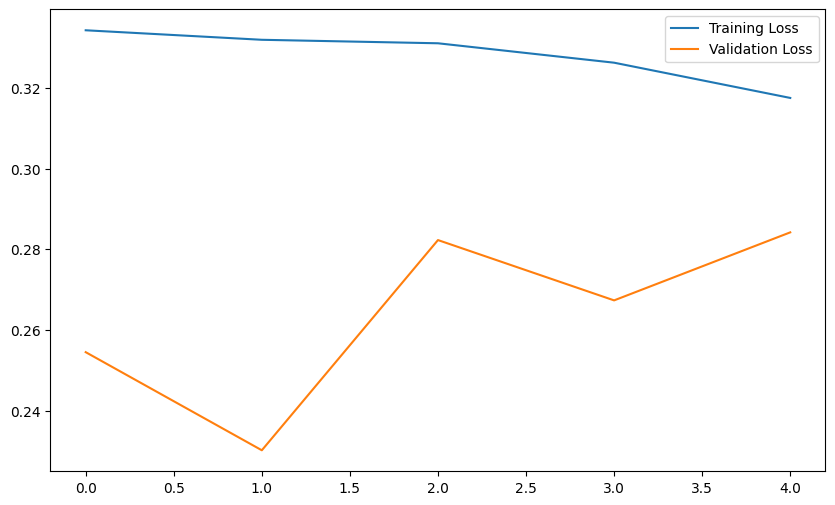

In [38]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [39]:
def predict_fun(img):
  plt.figure(figsize=(6, 4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224, 224, 3])
  result = np.argmax(model.predict(img))
  if result == 0:
    print('The image shown is Recyclable Waste')
  elif result == 1:
    print('The image shown is Organic Waste')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The image shown is Organic Waste


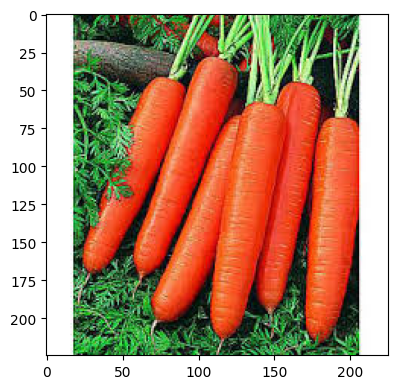

In [40]:
test_img = cv2.imread('/content/O_12572.jpg')
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
The image shown is Organic Waste


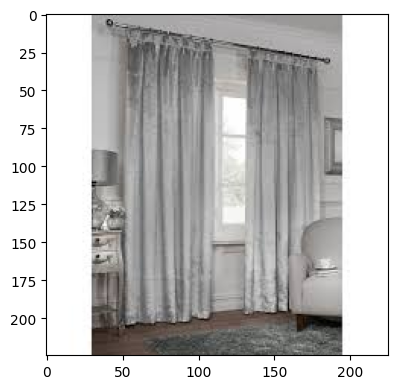

In [42]:
test_img = cv2.imread('/content/R_10010.jpg')
predict_fun(test_img)